# Analisando os filmes no geral

In [0]:
import pandas as pd
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [2]:
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ["usuarioId","filmeId","nota","momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas["nota"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [6]:
roundValue = 2
mean = str(round(notas["nota"].mean(),roundValue))
median = str(round(notas["nota"].median(),roundValue))


print("Média: " + mean)
print("Mediana: " + median)

Média: 3.5
Mediana: 3.5


In [7]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

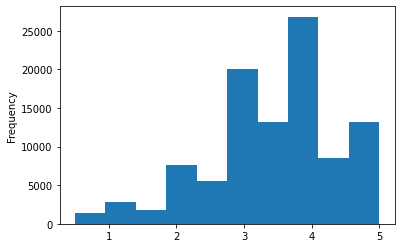

In [8]:
notas.nota.plot(kind="hist")

In [9]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


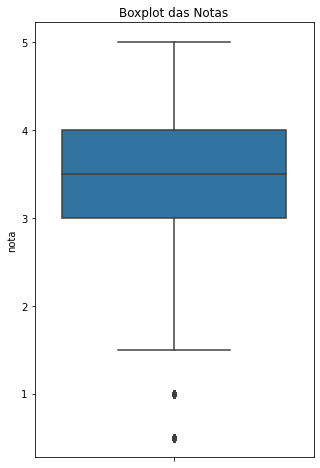

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
plt.title("Boxplot das Notas")
sns.boxplot(y=notas.nota)

# Olhando os Filmes

In [11]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando notas por Filme especifico

In [12]:
round(notas.query("filmeId==1").nota.mean(),2)

3.92

In [13]:
media_por_filme = notas.groupby("filmeId").nota.mean()
media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

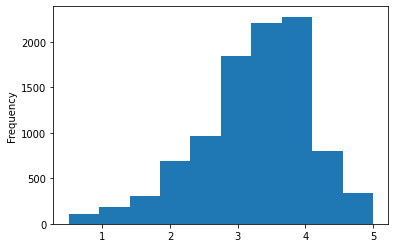

In [14]:
media_por_filme.plot(kind="hist")

Histograma feito pelo Seaborn com os Bins automaticos

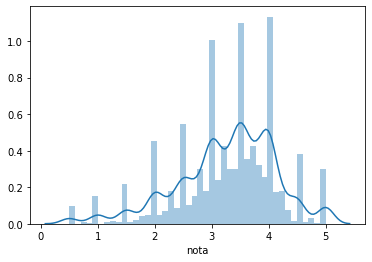

In [15]:
sns.distplot(media_por_filme)

Histograma feito pelo Seabon com a mesma quantidade de Bins que o Pandas utilizou

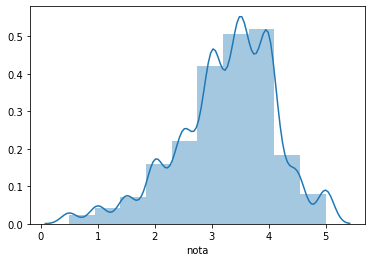

In [16]:
sns.distplot(media_por_filme, bins=10)

In [44]:
notas.head()
cadaNota = pd.DataFrame(notas["nota"].value_counts()).reset_index()
cadaNota.columns = ["nota","total"]
cadaNota

,nota,total
0,4.0,26818
1,3.0,20047
2,5.0,13211
3,3.5,13136
4,4.5,8551
5,2.0,7551
6,2.5,5550
7,1.0,2811
8,1.5,1791
9,0.5,1370


([<matplotlib.patches.Wedge at 0x7f258984c978>,
 [Text(0.7378653467312977, 0.8158153774556484, '4.0'),
  Text(-0.7293106517426986, 0.8234719019217598, '3.0'),
  Text(-1.0801622129161779, -0.20796536679944014, '5.0'),
  Text(-0.5840615947999327, -0.9321330664018734, '3.5'),
  Text(0.12723704283076437, -1.0926164628686876, '4.5'),
  Text(0.6369835883816279, -0.8968009300466101, '2.0'),
  Text(0.9406208010143207, -0.5702915997094627, '2.5'),
  Text(1.055769095320597, -0.3087905720159348, '1.0'),
  Text(1.0890579733646863, -0.15476669748625563, '1.5'),
  Text(1.0989981433267744, -0.046936989297386, '0.5')])

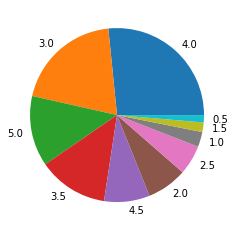

In [38]:
plt.pie(cadaNota["total"], labels = cadaNota["nota"])

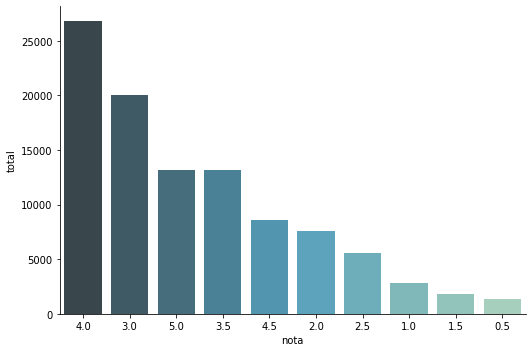

In [52]:
  sns.catplot(x = "nota", y = "total", 
              kind = "bar", 
              data = cadaNota,
              aspect = 1.5,
              palette = "GnBu_d",
              order = cadaNota["nota"])

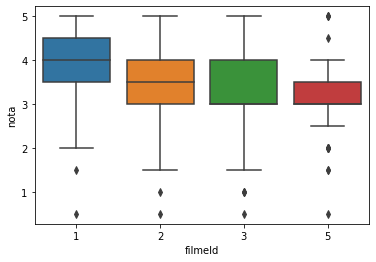

In [58]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2,3,5]"))